In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [7]:
df=pd.read_csv('Documents/income.csv')
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismael,28,60000
4,Kory,42,150000
5,Gaulan,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [11]:
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])
df

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismael,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gaulan,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [20]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.47507834985530956,
 0.368773407644059,
 0.31791760913326594,
 0.24555959191676224,
 0.1685851223602976,
 0.15205897076959982,
 0.10995816883086572]

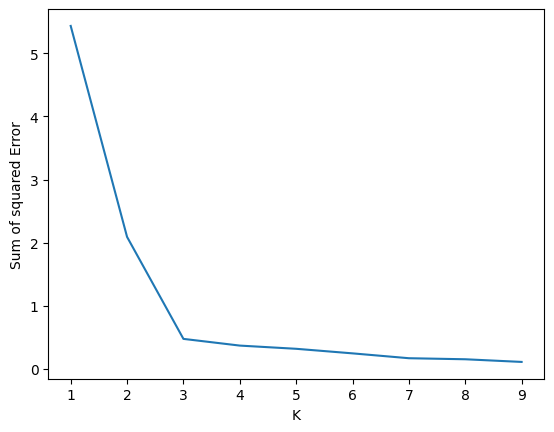

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared Error')
plt.plot(k_rng,sse)

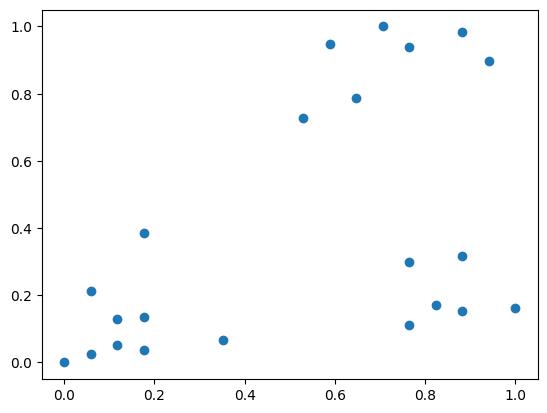

In [22]:
plt.scatter(df.Age,df.Income)

In [24]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
df['clusters']=y_predicted
df

,Name,Age,Income,clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismael,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gaulan,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [25]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
df2

,Name,Age,Income,clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismael,0.117647,0.128205,1
11,Tom,0.000000,0.000000,1
12,Arnold,0.058824,0.025641,1
13,Jared,0.117647,0.051282,1
14,Stark,0.176471,0.038462,1
15,Ranbir,0.352941,0.068376,1


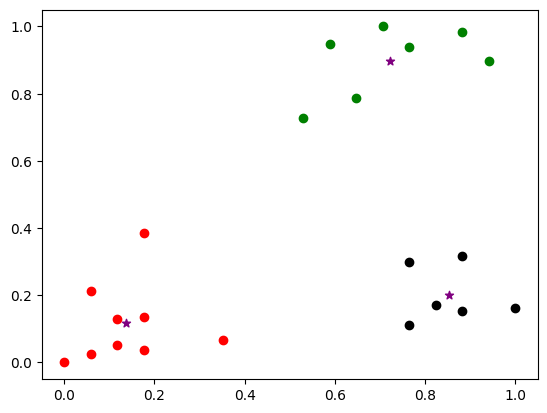

In [33]:
plt.scatter(df1.Age,df1.Income, color='green')
plt.scatter(df2.Age,df2.Income, color='red')
plt.scatter(df3.Age,df3.Income, color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [28]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])